In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

#THEORY
- One independent variable and one dependent variable.
- The one independent variable is transformed into multiple variable form. Based on the degrees, data will be converted into multiple variables.
- Different from multi linear as, in polynomial we will not a straight line like we got in multi linear.
- For non-linear data, we should use polynomial regression.
- If the EDA is in curve form, apply polynomial regression.

In [2]:
df = pd.read_csv('/content/ice_cream_selling_data.csv')
df.head()

,Temperature (C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.shape

(49, 2)

In [4]:
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values

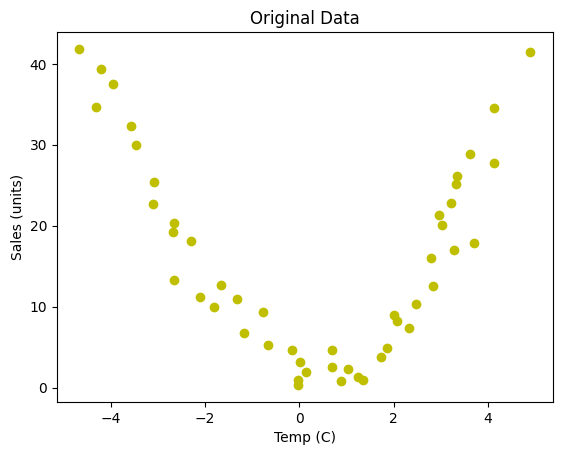

In [5]:
plt.scatter(X,y, color='y')
plt.title("Original Data")
plt.xlabel("Temp (C)")
plt.ylabel("Sales (units)")
plt.show()

In [6]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.2)

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(39, 3) (10, 3) (39,) (10,)


In [10]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.9411054328232783

In [11]:
df = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
print(df)

   Actual Values  Predicted Values
0       9.392969          4.683654
1      19.226970         18.222266
2      41.514822         42.821195
3      34.530743         30.764287
4       0.897603          2.981829
5      13.275828         18.000794
6       3.782570          7.055902
7       1.931416          2.869446
8      21.342916         16.539614
9       8.943823          8.616039


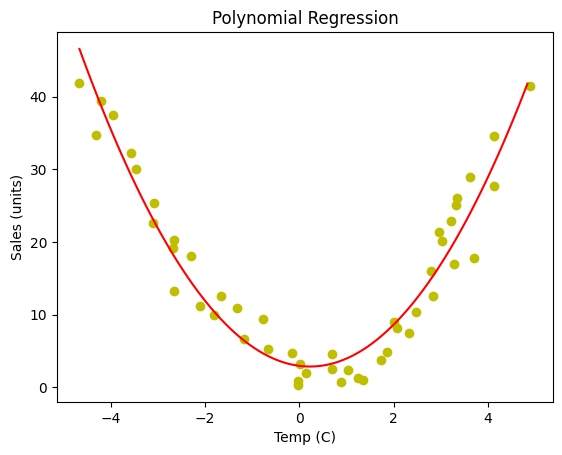

In [17]:
plt.scatter(X,y, color='y')
plt.title('Polynomial Regression')
plt.xlabel('Temp (C)')
plt.ylabel('Sales (units)')

X_grid = np.arange(X.min(), X.max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, model.predict(poly.fit_transform(X_grid)), color='red')
plt.show()